# library type SJ comparison

In [1]:
!date

Tue Sep  3 13:59:05 PDT 2024


In [2]:
!echo $CONDA_PREFIX

/c4/home/derek/miniconda3/envs/scquint_4


In [3]:
import pandas as pd
import scanpy as sc
import anndata

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy import stats

from scquint.data import load_adata_from_starsolo, add_gene_annotation

import seaborn as sns
from matplotlib_venn import venn2, venn3

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sc.set_figure_params(dpi=160)

In [4]:
input_dir = '/c4/home/derek/data1/derek/data_scSLR/immune_fastqs//'

In [5]:
output_dir = '/c4/home/derek/data1/derek/scSLR/notebooks/fig2/plots/'
os.makedirs(output_dir, exist_ok=True)

## get internal library

In [6]:
##for internal libraries

adatas_spl = {}
samples = ["sample_1",
           #"sample_2"]
library = "shared_internal"
for sample in samples:
    print(sample)
    try:
        adata_spl_sample = load_adata_from_starsolo(input_dir+f"/STAR_outs/{sample}/StarOut_{library}/Solo.out/SJ/raw/", var_filename="SJ.out.tab")
    except:
        adata_spl_sample = load_adata_from_starsolo(input_dir+f"/STAR_outs/{sample}/StarOut_{library}/Solo.out/SJ/raw/", var_filename="features.tsv")
    
    adata_spl_sample = adata_spl_sample[adata_spl_sample.obs_names.isin(pd.read_csv(input_dir+f"/PBMC_{sample}_idents.csv",sep='\t',header=None,index_col=0,names=['celltype']).index)]
    
    library = "internal"
    #get UMI counts
    UMI_counts = pd.read_csv(input_dir+f"/STAR_outs/{sample}/UMItools_count_outs/counts_{library}.tsv", sep="\t").groupby('cell')['count'].sum()
    
    UMI_counts = UMI_counts[UMI_counts.index.isin(pd.read_csv(input_dir+f"/PBMC_{sample}_idents.csv",sep='\t',header=None,index_col=0,names=['celltype']).index)]
    
    adata_spl_sample.obs['UMI_counts'] = UMI_counts.copy()
    
    adatas_spl[sample] = adata_spl_sample

sample_2



KeyboardInterrupt



In [ ]:
adata_spl_internal = anndata.concat(adatas_spl, index_unique="-", merge="same")
adata_spl_internal

## get 5prime library

In [ ]:
##for 5prime libraries

adatas_spl = {}
samples = [#"sample_1",
            "sample_2"]
library = "shared_5prime"
for sample in samples:
    print(sample)
    try:
        adata_spl_sample = load_adata_from_starsolo(input_dir+f"/STAR_outs/{sample}/StarOut_{library}/Solo.out/SJ/raw/", var_filename="SJ.out.tab")
    except:
        adata_spl_sample = load_adata_from_starsolo(input_dir+f"/STAR_outs/{sample}/StarOut_{library}/Solo.out/SJ/raw/", var_filename="features.tsv")
    
    adata_spl_sample = adata_spl_sample[adata_spl_sample.obs_names.isin(pd.read_csv(input_dir+f"/PBMC_{sample}_idents.csv",sep='\t',header=None,index_col=0,names=['celltype']).index)]
    
    library = "5prime"
    #get UMI counts
    UMI_counts = pd.read_csv(input_dir+f"/STAR_outs/{sample}/UMItools_count_outs/counts_{library}.tsv", sep="\t").groupby('cell')['count'].sum()
    UMI_counts = UMI_counts[UMI_counts.index.isin(pd.read_csv(input_dir+f"/PBMC_{sample}_idents.csv",sep='\t',header=None,index_col=0,names=['celltype']).index)]
    
    adata_spl_sample.obs['UMI_counts'] = UMI_counts.copy()
    
    adatas_spl[sample] = adata_spl_sample

In [ ]:
adata_spl_5prime = anndata.concat(adatas_spl, index_unique="-", merge="same")
adata_spl_5prime

## get merged library

In [ ]:
# ##for merged libraries

adatas_spl = {}
samples = [#"sample_1",
           "sample_2"]

library = "shared_merged"
for sample in samples:
    print(sample)
    try:
        adata_spl_sample = load_adata_from_starsolo(input_dir+f"/STAR_outs/{sample}/StarOut_{library}/Solo.out/SJ/raw/", var_filename="features.tsv")
    except:
        adata_spl_sample = load_adata_from_starsolo(input_dir+f"/STAR_outs/{sample}/StarOut_{library}/Solo.out/SJ/raw/", var_filename="SJ.out.tab")
    
    adata_spl_sample = adata_spl_sample[adata_spl_sample.obs_names.isin(pd.read_csv(input_dir+f"/PBMC_{sample}_idents.csv",sep='\t',header=None,index_col=0,names=['celltype']).index)]
    
    library = '5prime'
    #get UMI counts
    UMI_counts = pd.read_csv(input_dir+f"/STAR_outs/{sample}/UMItools_count_outs/counts_{library}.tsv", sep="\t").groupby('cell')['count'].sum()
    UMI_counts = UMI_counts[UMI_counts.index.isin(pd.read_csv(input_dir+f"/PBMC_{sample}_idents.csv",sep='\t',header=None,index_col=0,names=['celltype']).index)]
    
    adata_spl_sample.obs['UMI_counts'] = UMI_counts.copy()
    
    adatas_spl[sample] = adata_spl_sample

In [ ]:
adata_spl_merged = anndata.concat(adatas_spl, index_unique="-", merge="same")
adata_spl_merged

In [ ]:
######### /c4/home/derek/data1/derek/data_scSLR/immune_fastqs/sample_1/5prime_alignment_paired

In [ ]:

adatas_spl = {}
samples = [#"sample_1",
           "sample_2"
          ]

library = "init"
for sample in samples:
    print(sample)
    try:
        adata_spl_sample = load_adata_from_starsolo("/c4/home/derek/data1/derek/data_scSLR/immune_fastqs/sample_2/5prime_alignment_paired/Solo.out/SJ/raw/", var_filename="features.tsv")
    except:
        adata_spl_sample = load_adata_from_starsolo("/c4/home/derek/data1/derek/data_scSLR/immune_fastqs/sample_/5prime_alignment_paired/Solo.out/SJ/raw/", var_filename="SJ.out.tab")
    
    adata_spl_sample = adata_spl_sample[adata_spl_sample.obs_names.isin(pd.read_csv(input_dir+f"/PBMC_{sample}_idents.csv",sep='\t',header=None,index_col=0,names=['celltype']).index)]
    
    library = '5prime'
    #get UMI counts
#     UMI_counts = pd.read_csv(input_dir+f"/STAR_outs/{sample}/UMItools_count_outs/counts_{library}.tsv", sep="\t").groupby('cell')['count'].sum()
#     UMI_counts = UMI_counts[UMI_counts.index.isin(pd.read_csv(input_dir+f"/PBMC_{sample}_idents.csv",sep='\t',header=None,index_col=0,names=['celltype']).index)]
    
#     adata_spl_sample.obs['UMI_counts'] = UMI_counts.copy()
    
    adatas_spl[sample] = adata_spl_sample

sample_2


NameError: name 'load_adata_from_starsolo' is not defined

In [11]:
tmep = sc.get.obs_df(adata_spl_sample,
              keys=[ *['chr1:198692374-198703297']]
             )
              
              

In [15]:
tmep['chr1:198692374-198703297'].sum()

13.0

In [ ]:
temp = sc.get.obs_df(adata_spl_sample,
              keys=["batch", *['chr1:198692374-198703297']]
             )

## get 10X libraries

In [12]:
##for 10X libraries

adatas_spl = {}
samples = [#"sample_1",
           "sample_2"]
library = "10X"

In [13]:
# input_dir_10X = '/c4/home/derek/data1/derek/data_scSLR/PBMC/'

In [14]:
input_dir

'/c4/home/derek/data1/derek/data_scSLR/PBMC/'

In [15]:
for sample in samples:
    print(sample)
    try:
        adata_spl_sample = load_adata_from_starsolo(input_dir+f"/10X/STAR_outs/{sample}/StarOut_{library}/Solo.out/SJ/raw/", var_filename="features.tsv")
    except:
        adata_spl_sample = load_adata_from_starsolo(input_dir+f"/10X/STAR_outs/{sample}/StarOut_{library}/Solo.out/SJ/raw/", var_filename="SJ.out.tab")
    
    adata_spl_sample = adata_spl_sample[adata_spl_sample.obs_names.isin(pd.read_csv(input_dir+f"/PBMC_{sample}_idents.csv",sep='\t',header=None,index_col=0,names=['celltype']).index)]
    
    library = "5prime"
    
    UMI_counts = pd.read_csv(input_dir+f"/10X/STAR_outs/{sample}/UMItools_quant_outs/counts_{library}.tsv", sep="\t").groupby('cell')['count'].sum()
    UMI_counts = UMI_counts[UMI_counts.index.isin(pd.read_csv(input_dir+f"/PBMC_{sample}_idents.csv",sep='\t',header=None,index_col=0,names=['celltype']).index)]
    
    adata_spl_sample.obs['UMI_counts'] = UMI_counts.copy()
    
    adatas_spl[sample] = adata_spl_sample
    
  

sample_2
Filtering out undefined strand.


/scratch/derek/ipykernel_2673318/3267201706.py:15: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_spl_sample.obs['UMI_counts'] = UMI_counts.copy()


In [16]:
adata_spl_10X = anndata.concat(adatas_spl, index_unique="-", merge="same")
# adata_spl_10X

In [17]:
sc.pp.calculate_qc_metrics(adata_spl_5prime,inplace=True)
sc.pp.calculate_qc_metrics(adata_spl_internal,inplace=True)
sc.pp.calculate_qc_metrics(adata_spl_merged,inplace=True)
sc.pp.calculate_qc_metrics(adata_spl_10X ,inplace=True)

## combine into single anndata object

In [18]:
adata = adata_spl_5prime.concatenate([adata_spl_internal,
                                      adata_spl_merged,
                                      adata_spl_10X
                                     ],
                                 batch_categories=['5prime',
                                                   'internal',
                                                   'merged',
                                                   '10X'
                                                  ],
                                 join='outer' 
                                )

In [19]:
adata.var = adata.var.drop(adata.var.columns.tolist(),axis=1)

In [20]:
adata.obs[adata.obs.index.str.startswith('AAACCTGAGAGTACAT')]

,UMI_counts,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,batch
AAACCTGAGAGTACAT-sample_2-5prime,5785,2143,7.670429,3217.0,8.076515,14.081442,20.826857,30.836183,48.927572,5prime
AAACCTGAGAGTACAT-sample_2-internal,1227,2397,7.782390,3262.0,8.090403,13.917842,19.374617,27.191907,41.845494,internal
AAACCTGAGAGTACAT-sample_2-merged,5785,4040,8.304247,6370.0,8.759512,12.244898,17.645212,25.164835,38.885400,merged
AAACCTGAGAGTACAT-sample_2-10X,8772,2164,7.680176,4349.0,8.377932,26.948724,36.077259,45.964590,61.462405,10X


In [21]:
#set colormap 
c_internal = (0.9098039215686274, 0.0, 0.043137254901960784) #blue
c_5prime = (0.00784313725490196, 0.24313725490196078, 1.0) #red
c_merged = (127.0, 0.0, 127.0)
c_10X = (0.25,0.25,0.25) #black

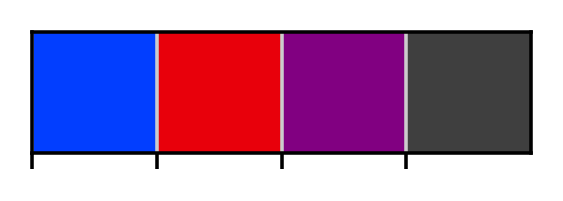

In [22]:
sns.palplot([c_5prime, c_internal, c_merged, c_10X], size=0.5)

In [23]:
adata.uns['batch_colors'] = [c_5prime, c_internal, c_merged, c_10X]

In [24]:
#sc.pp.calculate_qc_metrics(adata,inplace=True)

In [25]:
print('5prime SJ counts: '+ str(adata_spl_5prime.obs['total_counts'].sum()))

5prime SJ counts: 20532256.0


In [26]:
print('internal SJ counts: '+ str(adata_spl_internal.obs['total_counts'].sum()))

internal SJ counts: 18490264.0


In [27]:
print('merged SJ counts: '+ str(adata_spl_merged.obs['total_counts'].sum()))

merged SJ counts: 38153348.0


In [28]:
print('10X SJ counts: '+ str(adata_spl_10X.obs['total_counts'].sum()))

10X SJ counts: 25827544.0


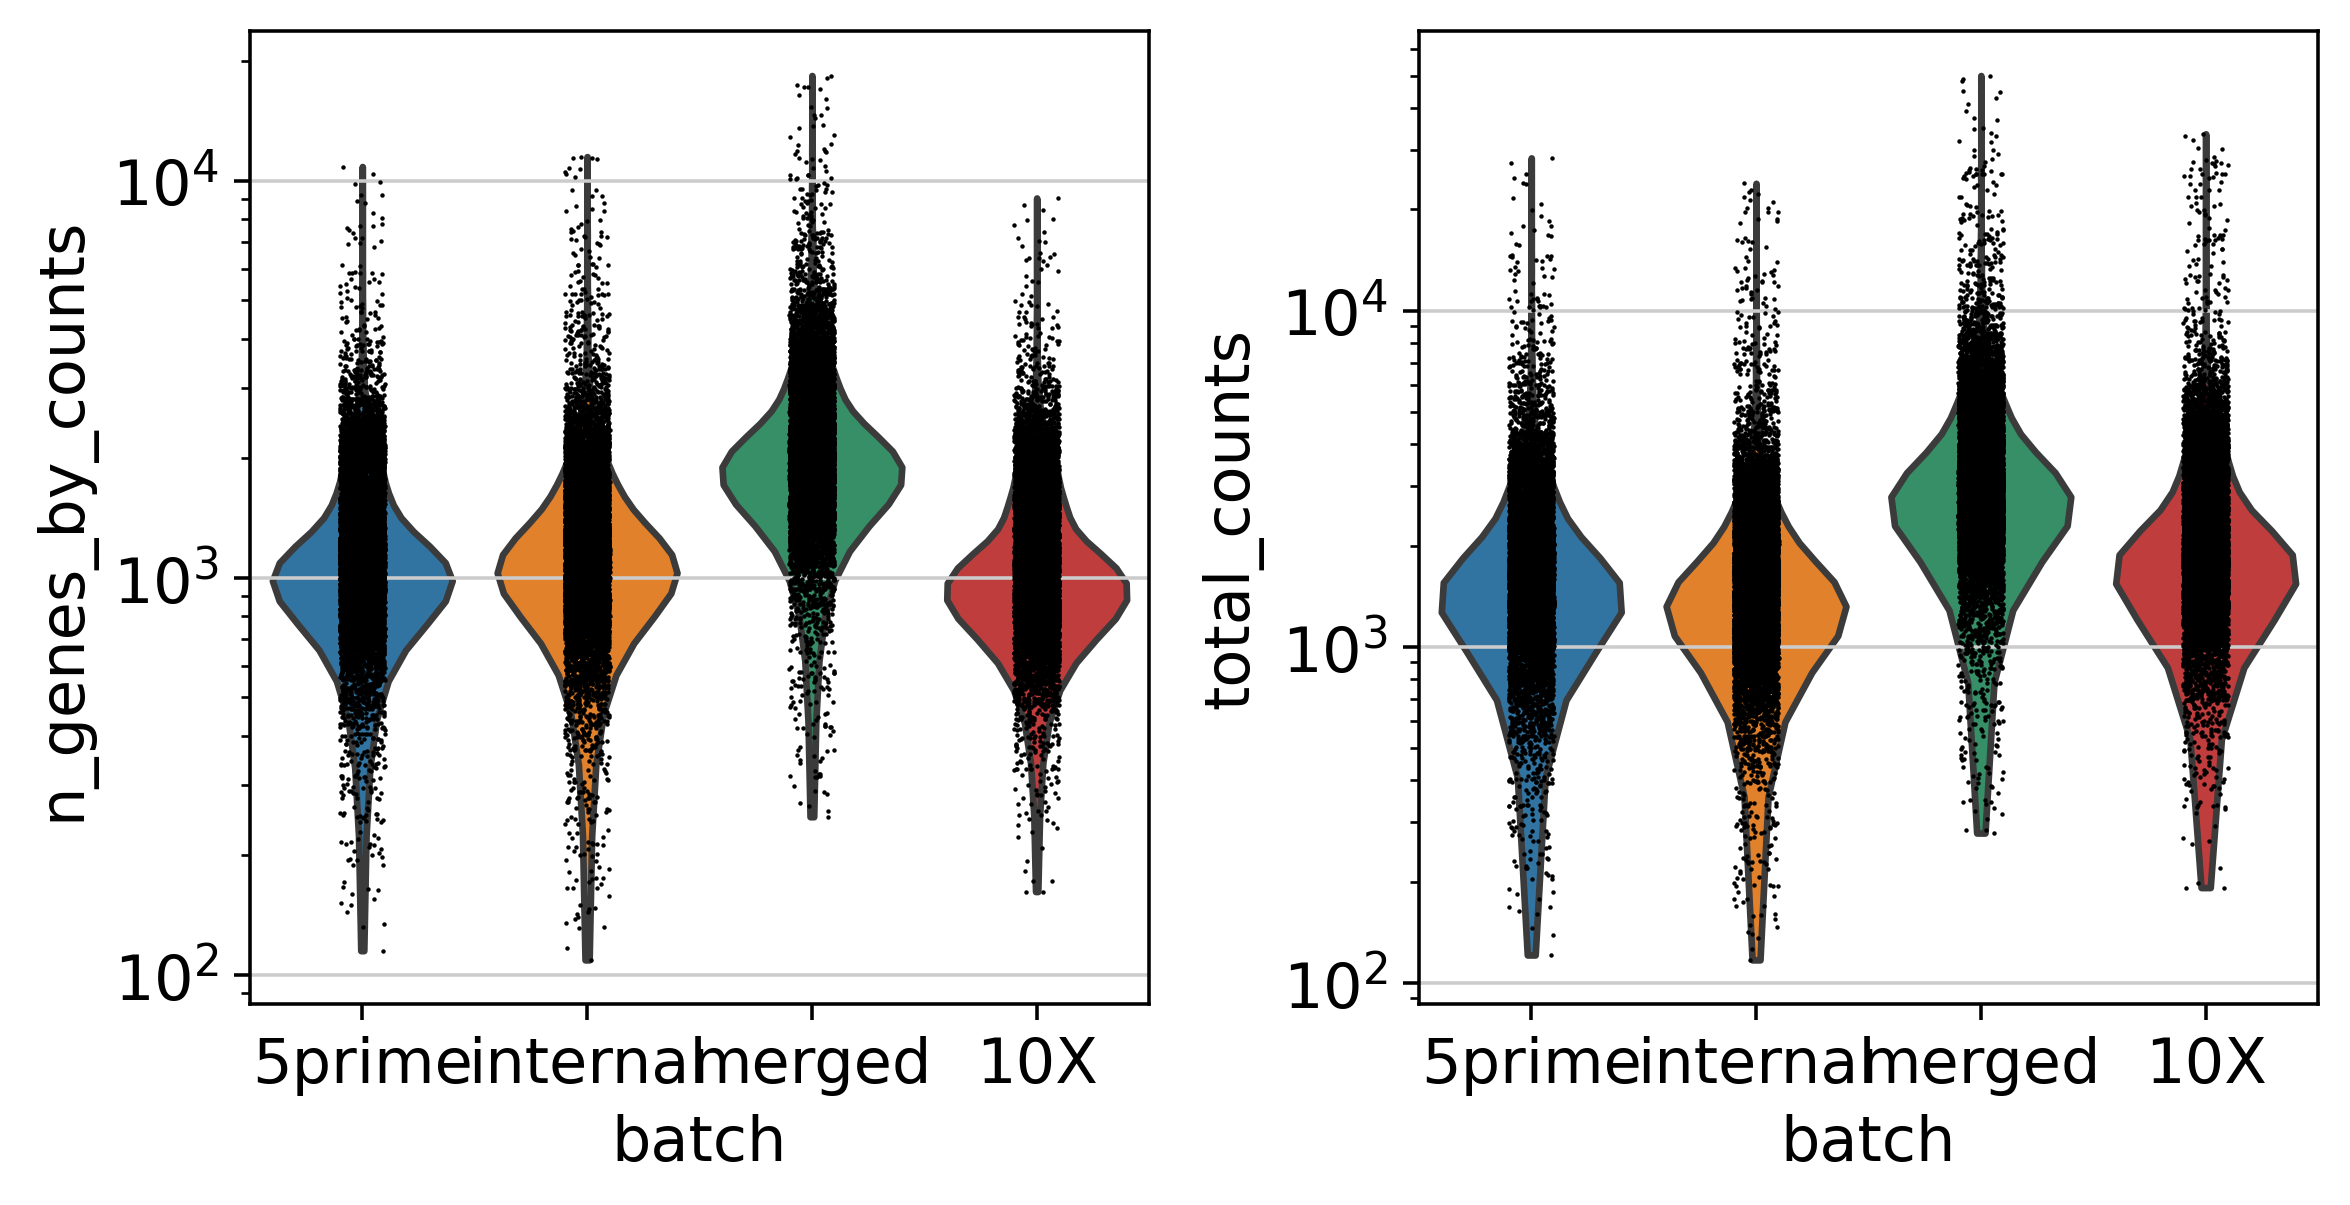

In [29]:
sc.pl.violin(adata,
             keys=['n_genes_by_counts','total_counts'],
             groupby='batch',
             log=True,
            )

In [30]:
figsize=(3, 3)

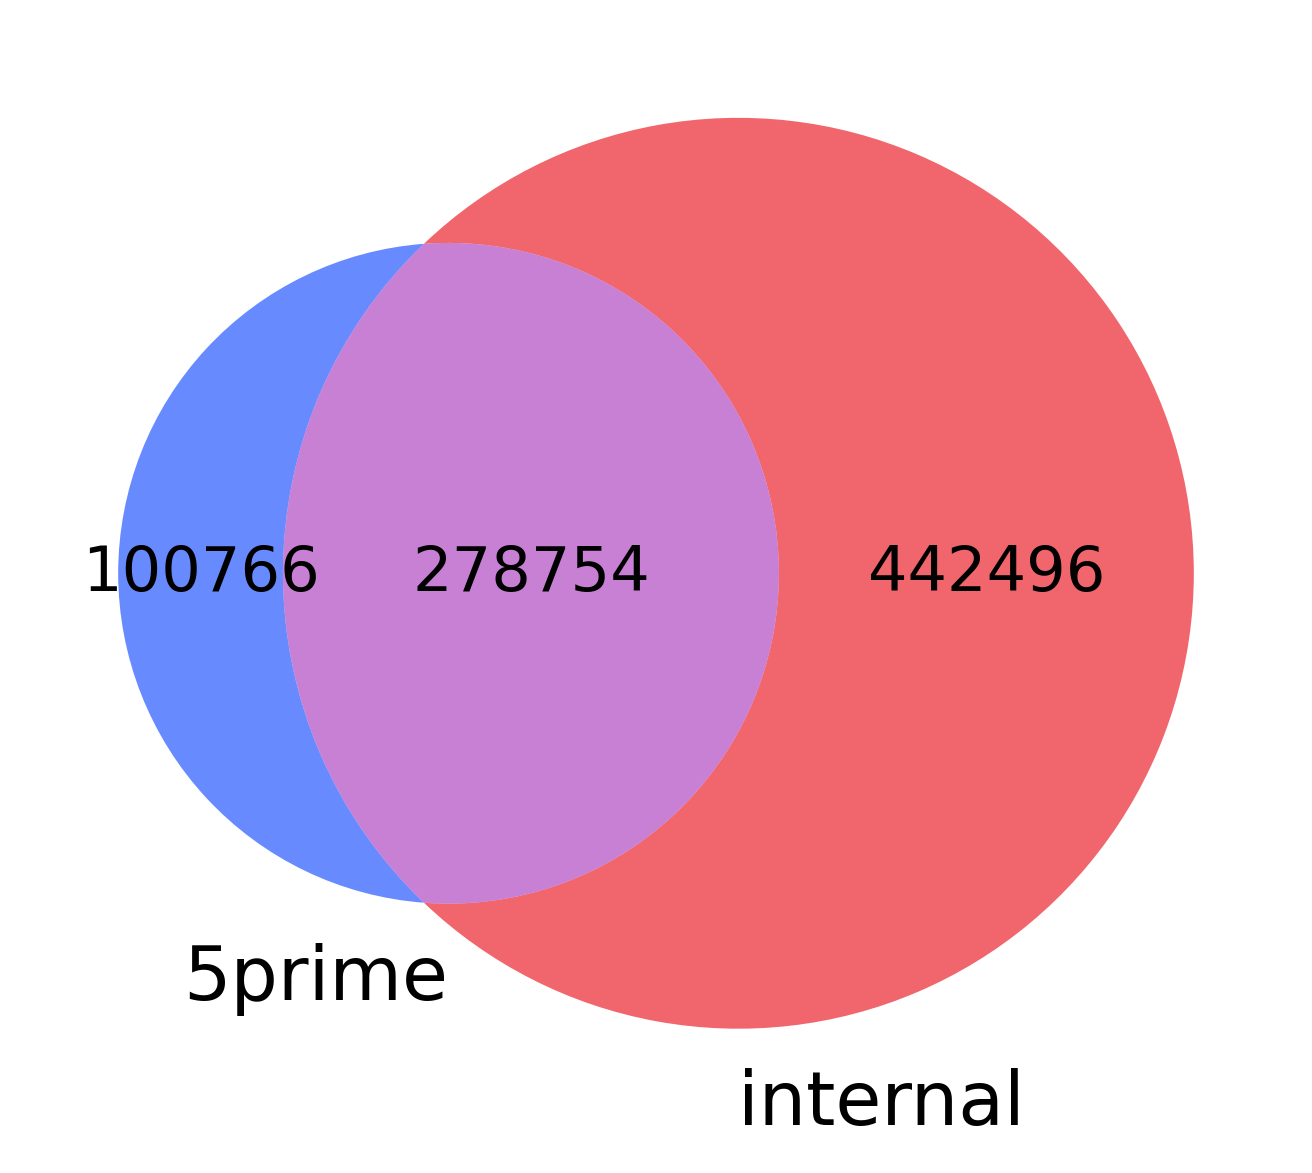

In [31]:
fig, ax = plt.subplots(figsize=(5,5))

venn2([set(adata_spl_5prime.var_names),set(adata_spl_internal.var_names)],
      set_labels=('5prime', 'internal'),
      set_colors=(c_5prime,c_internal),
      ax=ax,
      alpha=0.6
     )






In [32]:
sample

'sample_2'

In [33]:
# pd.read_csv(input_dir+f"/10X/STAR_outs/{sample})

In [34]:
os.listdir(input_dir+f'/STAR_outs/{sample}')
           
           
           
           
           
           

['merged_complete_name_sort_shared.5prime.temp_sort.bam.bai',
 'StarOut_merged',
 'merged_complete.bam',
 'merged_complete.bam.bai',
 'StarOut_internal',
 'StarOut_5prime',
 'StarOut_shared_5prime',
 'read_distribution_internal.txt',
 'read_distribution_5prime.txt',
 'orig_StarOut_shared_internal',
 'merged_complete_name_sort_shared.internal.temp_sort.bam',
 'counts_internal.tsv',
 'LOGFILE',
 'merged_complete_name_sort_shared.bam_merged.temp',
 'merged_complete_name_sort_shared.bam_merged.sort.temp.bai',
 'merged_complete_name_sort_shared.bam',
 'UMItools_count_outs',
 'tag_file.txt',
 'orig_StarOut_shared_5prime',
 'orig_StarOut_shared_merged',
 'merged_complete_name_sort_shared.5prime.temp_sort.bam',
 'StarSolo.sh',
 'StarOut_shared_merged',
 'UMItools_dedup_orig',
 'UMItools_dedup_outs',
 'StarOut_shared_internal',
 'merged_complete_name_sort_shared.internal.temp_sort.bam.bai',
 'StarOut_shared_5prime_redo',
 'merged_complete_name_sort_shared.bam_merged.sort.temp']

In [35]:
input_dir

'/c4/home/derek/data1/derek/data_scSLR/PBMC/'

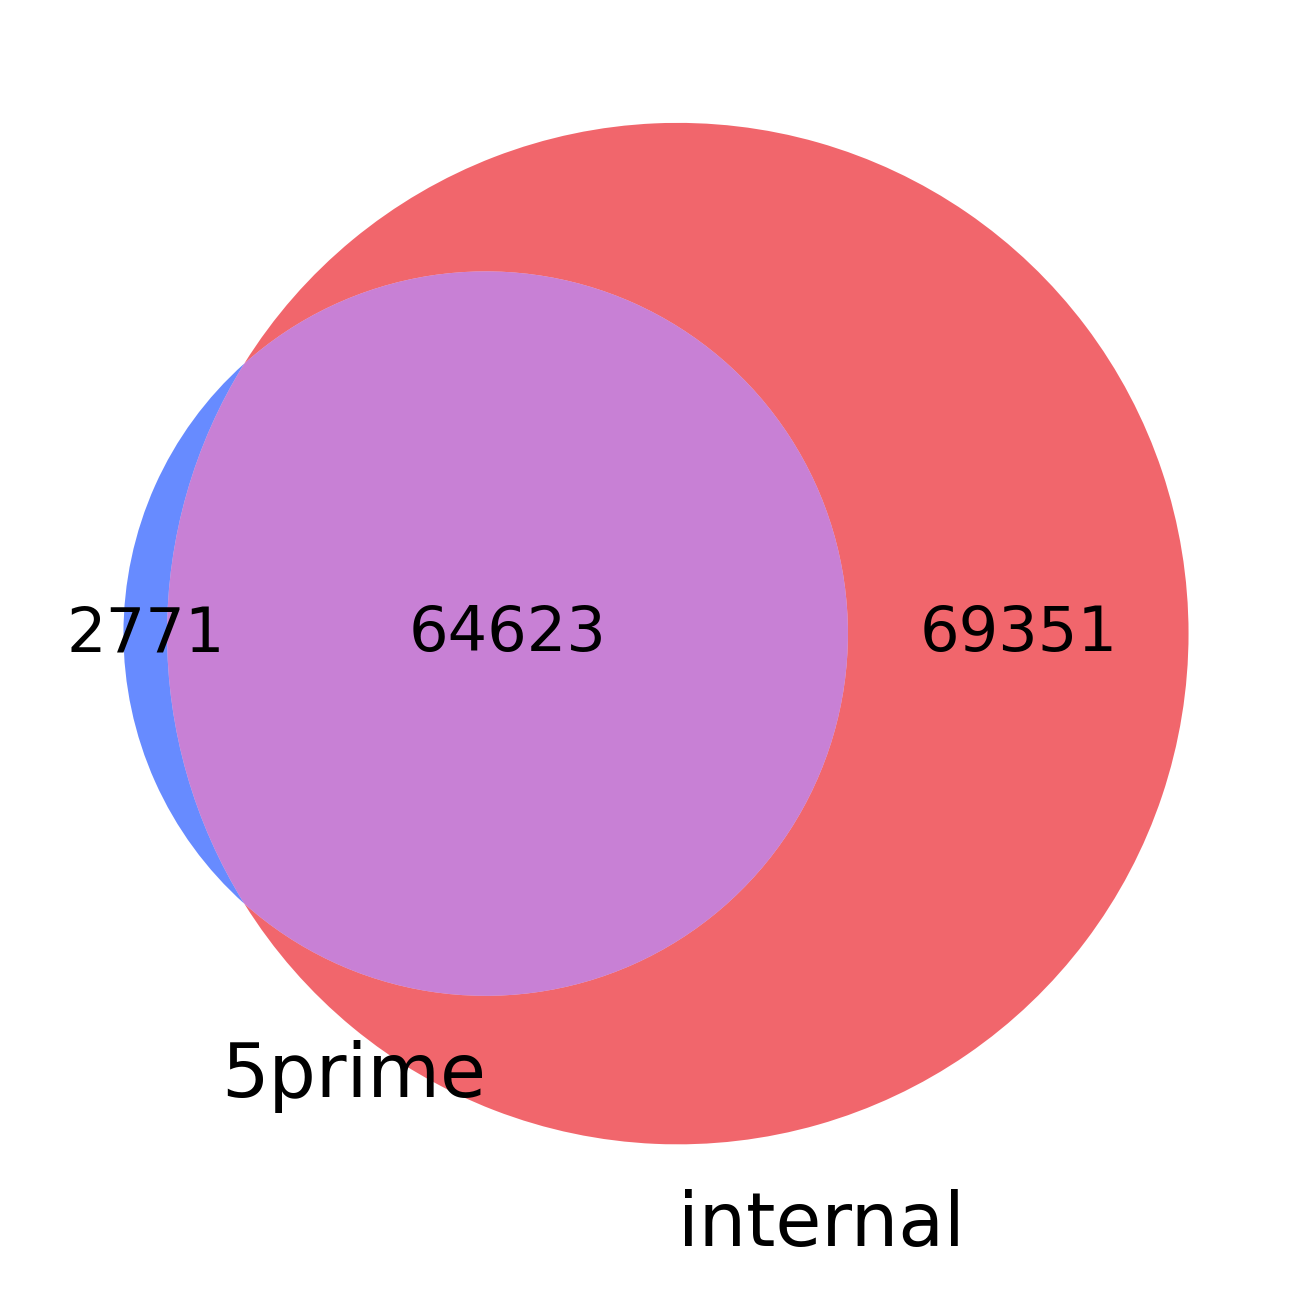

In [36]:
fig, ax = plt.subplots(figsize=(5,5))

venn2([set(adata_spl_5prime.var_names[adata_spl_5prime.var['total_unique_mapping'] > 100]),
       set(adata_spl_internal.var_names[adata_spl_internal.var['total_unique_mapping'] > 100])],
      set_labels=('5prime', 'internal'),
      set_colors=(c_5prime,c_internal),
      ax=ax,
      alpha=0.6
     )

# fig.savefig(output_dir + 'comparison_SJ_unique_venn.pdf')



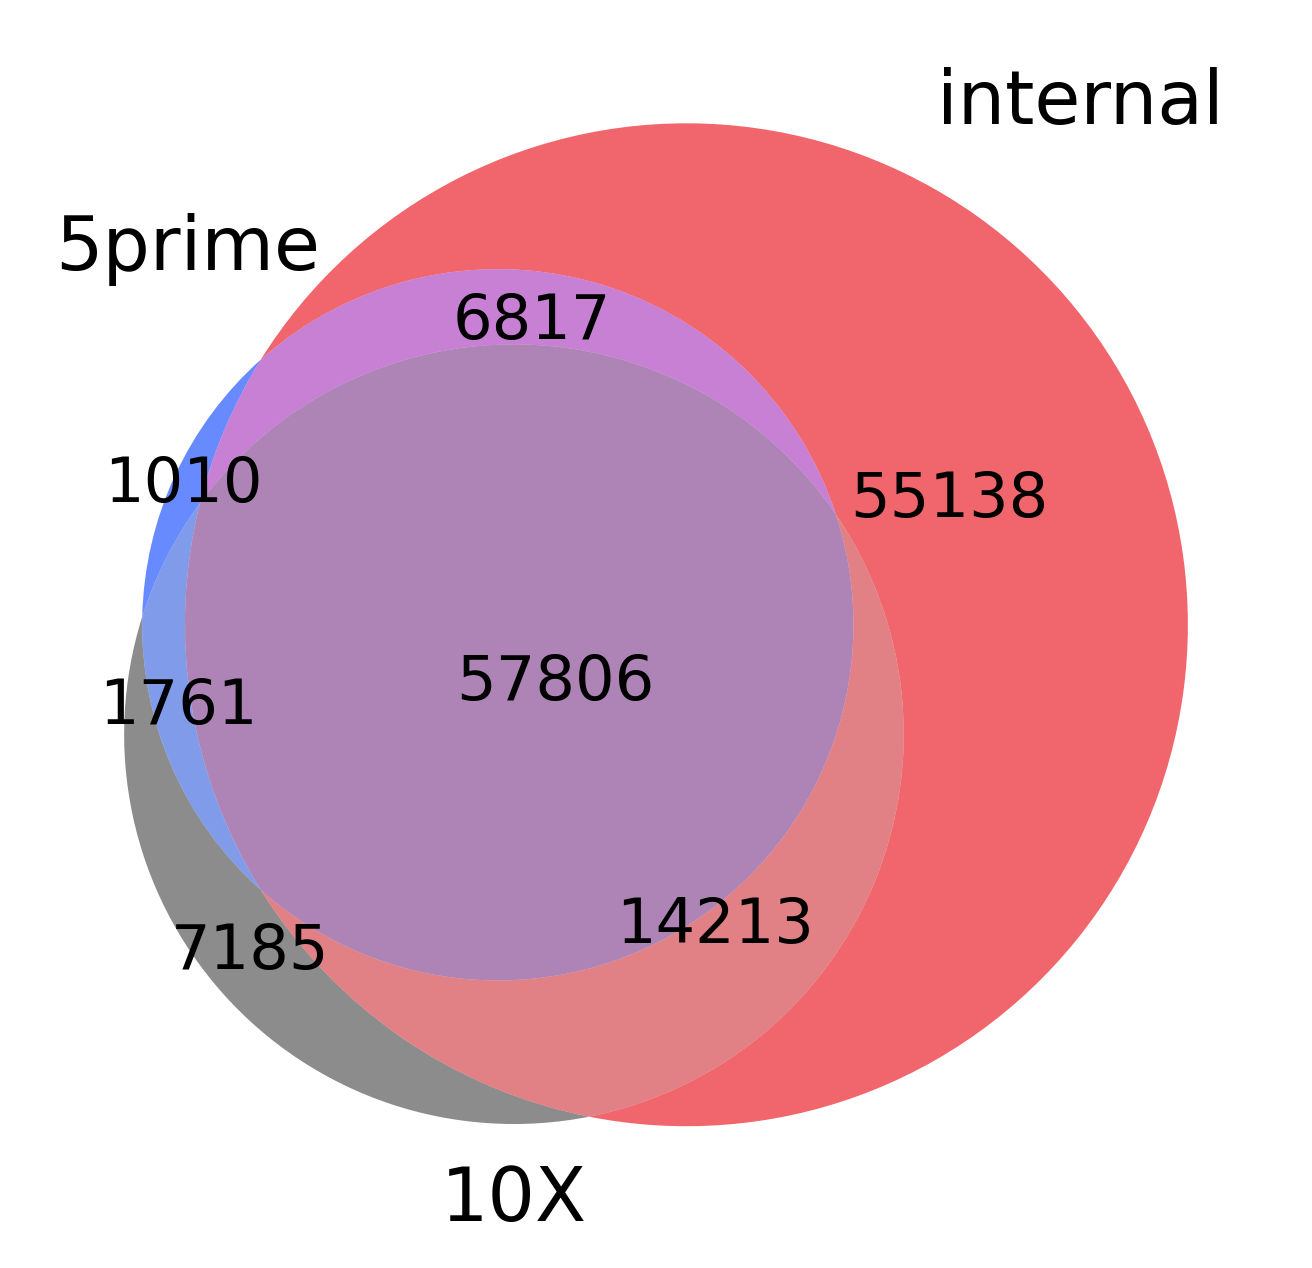

In [37]:
fig, ax = plt.subplots(figsize=(5,5))

venn3([set(adata_spl_5prime.var_names[adata_spl_5prime.var['total_unique_mapping'] > 100]),
       set(adata_spl_internal.var_names[adata_spl_internal.var['total_unique_mapping'] > 100]),
      set(adata_spl_10X.var_names[adata_spl_10X.var['total_unique_mapping'] > 100])],
      set_labels=('5prime', 'internal','10X'),
      set_colors=(c_5prime,c_internal,c_10X),
      ax=ax,
      alpha=0.6
     )

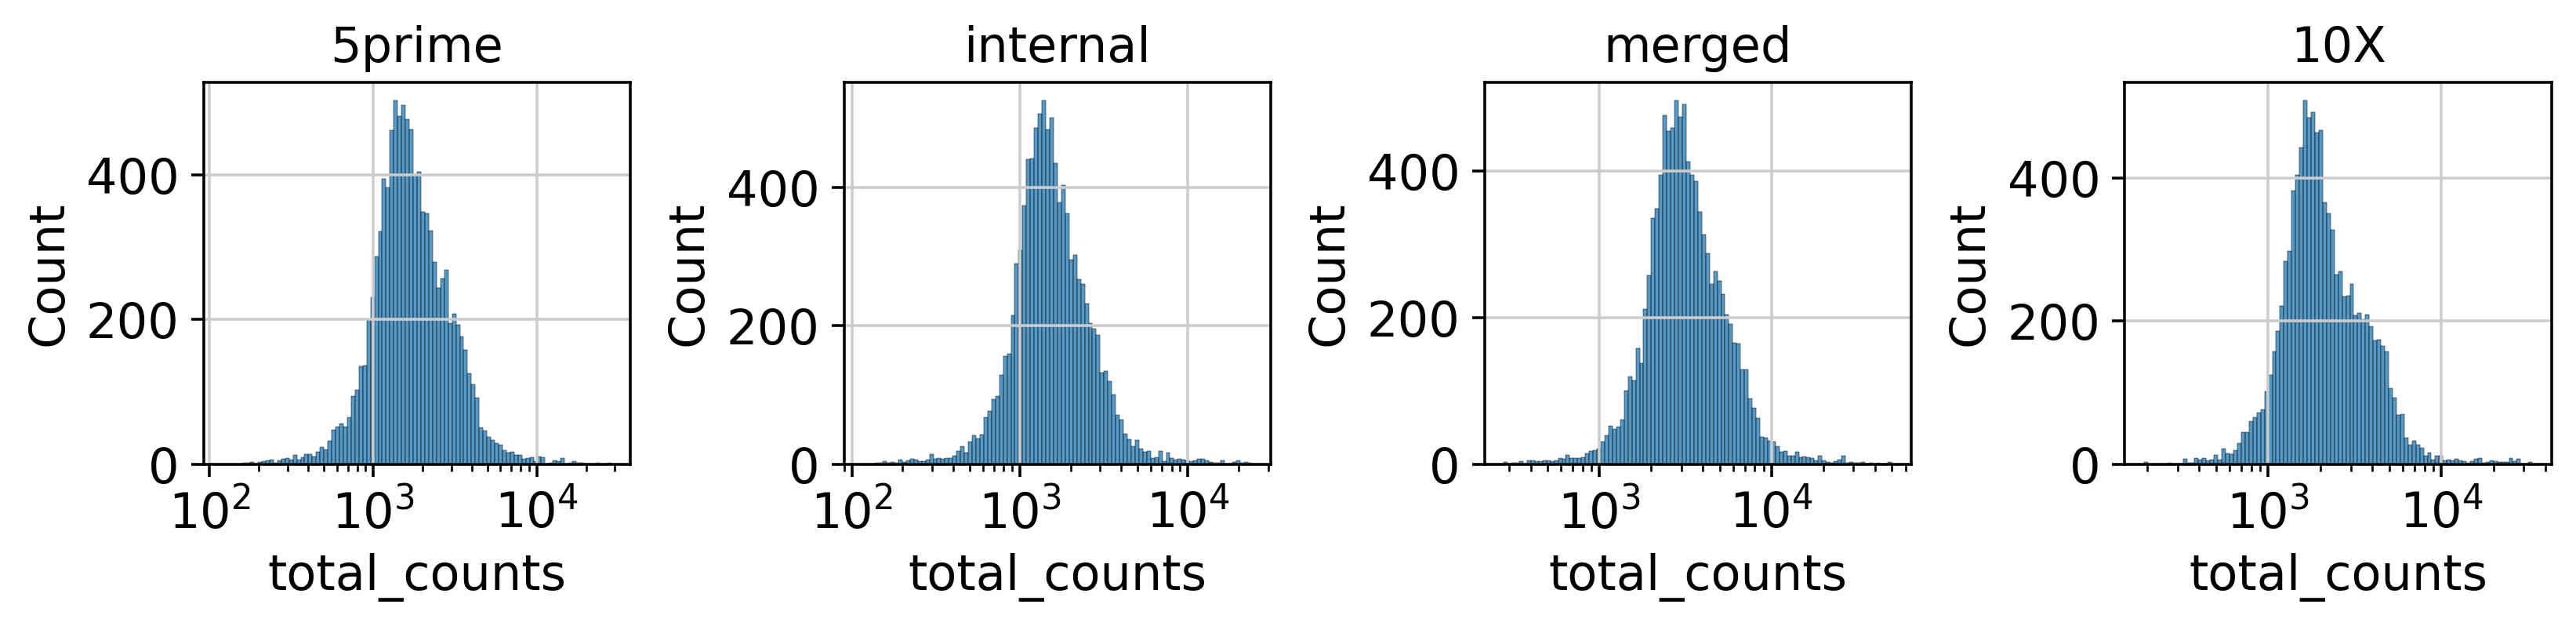

In [38]:
fig, axes = plt.subplots(1, 4, figsize=(12, 2))

plt.subplots_adjust(wspace=0.5)

for i, ax in zip(adata.obs.batch.cat.categories.tolist(), axes.ravel()):
    sns.histplot(adata[adata.obs["batch"] == i].obs["total_counts"],ax=ax,
                 bins=100, kde=False, log_scale =True).set(title=i)

In [39]:
# fig, axes = plt.subplots(1, 3, figsize=(8, 2))

# plt.subplots_adjust(wspace=0.5)

# for i, ax in zip(adata.obs.batch.cat.categories.tolist(), axes.ravel()):
#     sns.histplot(adata[adata.obs["batch"] == i].obs["UMI_counts"],ax=ax,
#                  bins=100, kde=False, log_scale =True).set(title=i)

In [40]:
adata.obs['log10_n_genes'] = np.log10(adata.obs.n_genes_by_counts)

# adata_spl_5prime.obs['log10_n_genes'] = np.log10(adata_spl_5prime.obs.n_genes_by_counts)
# adata_spl_internal.obs['log10_n_genes'] = np.log10(adata_spl_internal.obs.n_genes_by_counts)
# adata_spl_merged.obs['log10_n_genes'] = np.log10(adata_spl_merged.obs.n_genes_by_counts)

In [41]:
# fig, ax = plt.subplots(1,1)



# sns.scatterplot(data=adata_5prime.obs,
#                 x='total_counts',
#                 y='log10_n_genes',
#                 s=1,
#                 linewidth=0,
#                 alpha=.25,
#                 ax=ax
#                )

# sns.scatterplot(data=adata_internal.obs,
#                 x='total_counts',
#                 y='log10_n_genes',
#                 s=1,
#                 linewidth=0,
#                 alpha=.25,
#                 ax=ax,
#                )

In [42]:
adata.obs

,UMI_counts,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,batch,log10_n_genes
AAACCTGAGAGTACAT-sample_2-5prime,5785,2143,7.670429,3217.0,8.076515,14.081442,20.826857,30.836183,48.927572,5prime,3.331022
AAACCTGAGAGTGACC-sample_2-5prime,2758,1168,7.063904,2036.0,7.619234,20.481336,32.465619,47.347741,67.190570,5prime,3.067443
AAACCTGAGATGTTAG-sample_2-5prime,3567,1142,7.041412,1531.0,7.334330,17.896799,26.192031,38.471587,58.066623,5prime,3.057666
AAACCTGAGCAGCCTC-sample_2-5prime,2601,1061,6.967909,1789.0,7.489971,22.526551,34.712130,49.189491,68.641699,5prime,3.025715
AAACCTGAGCGTTCCG-sample_2-5prime,1490,762,6.637258,999.0,6.907755,19.619620,30.030030,43.743744,73.773774,5prime,2.881955
...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAGTGTTGAGG-sample_2-10X,4626,1058,6.965080,2276.0,7.730614,39.982425,51.977153,61.906854,75.483304,10X,3.024486
TTTGTCAGTTGGACCC-sample_2-10X,7240,1909,7.554859,4110.0,8.321422,30.754258,39.756691,49.781022,65.717762,10X,3.280806
TTTGTCAGTTGTACAC-sample_2-10X,2476,739,6.606650,1203.0,7.093405,34.995844,44.555278,55.195345,80.133001,10X,2.868644
TTTGTCATCCGGGTGT-sample_2-10X,2311,718,6.577861,1199.0,7.090077,35.446205,46.038365,56.797331,81.818182,10X,2.856124


In [43]:
adata.obs['ratio'] = adata.obs.n_genes_by_counts/adata.obs.UMI_counts

Text(0.5, 0, 'Library type')

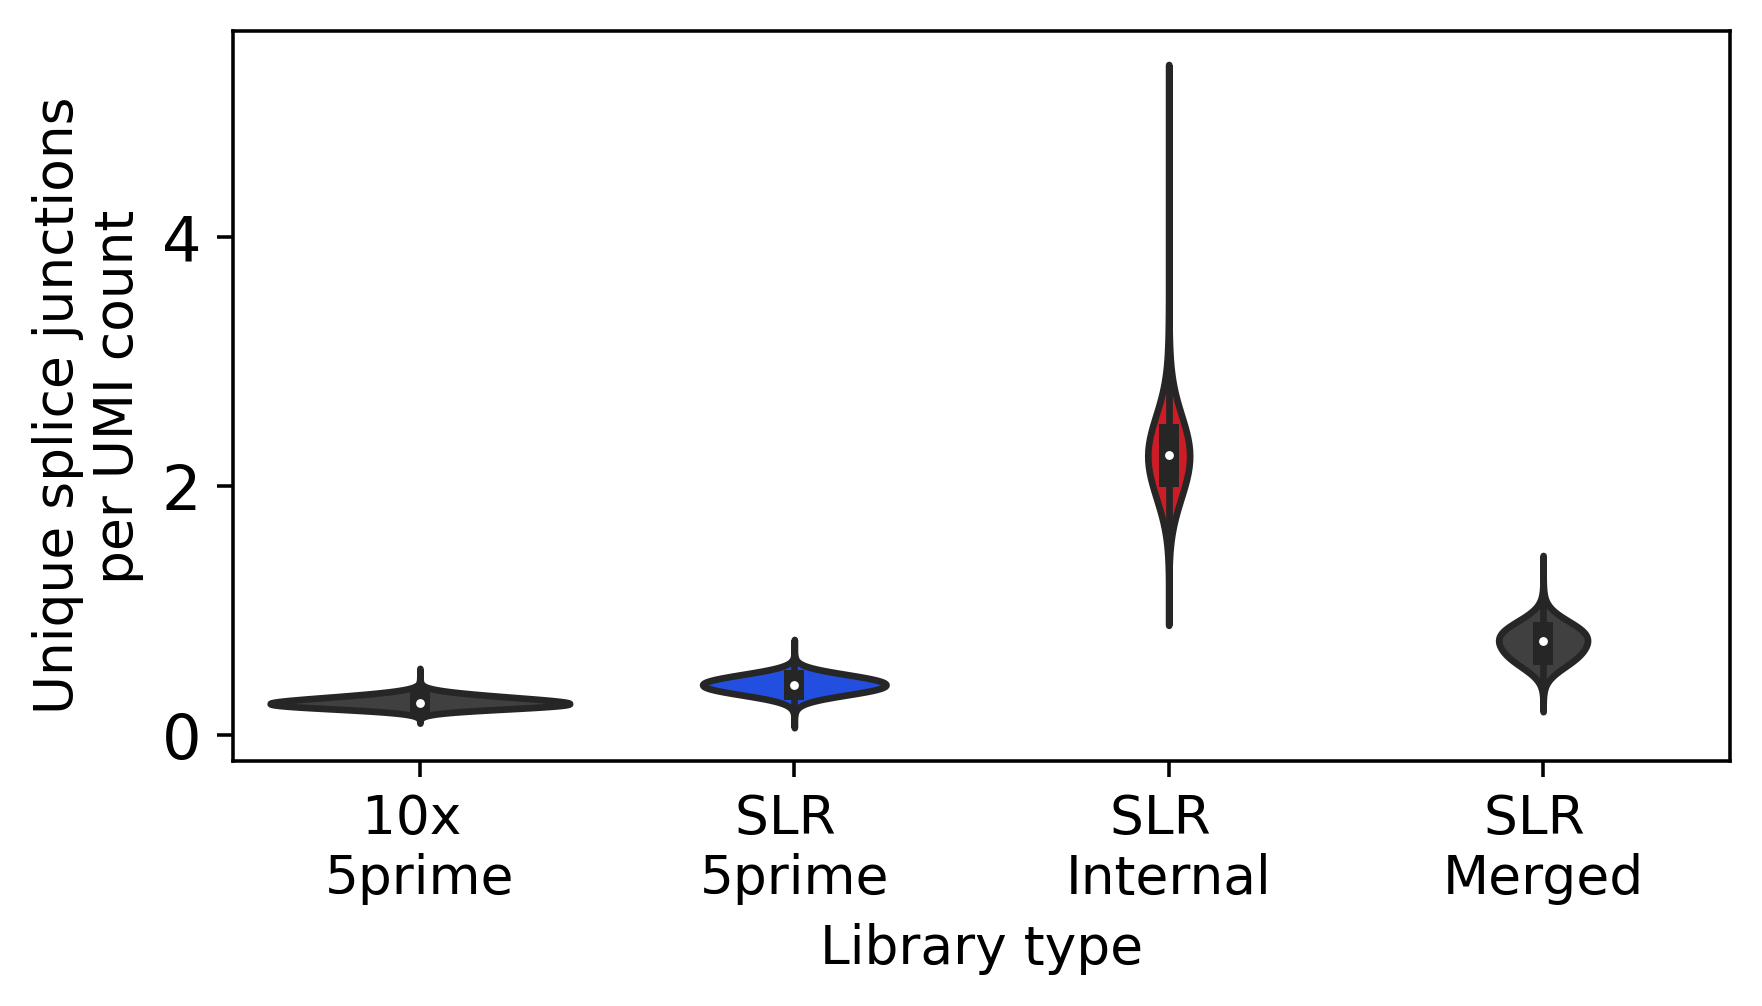

In [44]:
fig, ax = plt.subplots(1,1,
                      figsize=(6, 3)
                      )

sns.violinplot(data=adata.obs, 
               x='batch',
               y='ratio', ax=ax,
                bw=.8,
               scale='area',
               palette=[c_10X, c_5prime, c_internal],
               order=['10X','5prime','internal','merged']
              )

# sns.stripplot(data=adata.obs,
#             x="batch", 
#             y="ratio", 
#                    color="black", edgecolor="gray",
#               size=.5,
#               ax=ax
#          )


ax.grid(False)

ax.set_xticklabels(['10x \n5prime', 'SLR \n5prime', 'SLR \nInternal', 
                    'SLR \nMerged'
                   ],fontsize=12)
#ax.set_yticklabels(['0.2','0.4','0.6','0.8','1.0','1.2','1.4','1.6'],fontsize=12)



ax.set_ylabel("Unique splice junctions \n per UMI count ", fontsize=12)
ax.set_xlabel('Library type', fontsize=12)

# fig.savefig(output_dir + 'comparison_SJ_ratio_violins.pdf')

In [46]:
c_5prime

(0.00784313725490196, 0.24313725490196078, 1.0)

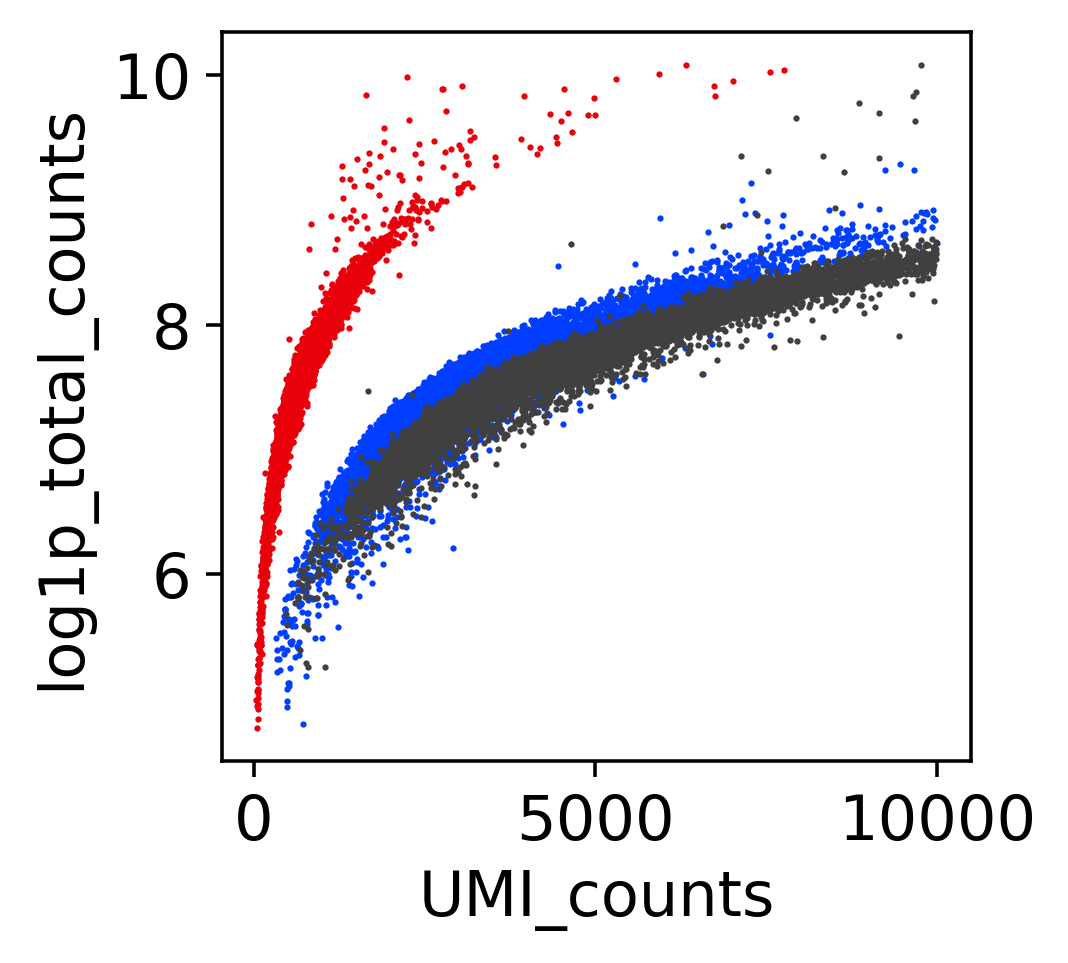

In [47]:
fig, ax = plt.subplots(figsize=(3, 3))

obs_5p = adata[(adata.obs.UMI_counts <= 10000) & (adata.obs.batch == '5prime')].obs

values_5p = np.vstack([obs_5p['UMI_counts'], obs_5p["log1p_total_counts"]])
kernel_5p = stats.gaussian_kde(values_5p)(values_5p)


obs_int = adata[(adata.obs.UMI_counts <= 10000) & (adata.obs.batch == 'internal')].obs           

values_int = np.vstack([obs_int['UMI_counts'], obs_int["log1p_total_counts"]])
kernel_int = stats.gaussian_kde(values_int)(values_int)


obs_10X = adata[(adata.obs.UMI_counts <= 10000) & (adata.obs.batch == '10X')].obs           

values_10X = np.vstack([obs_10X['UMI_counts'], obs_10X["log1p_total_counts"]])
kernel_10X = stats.gaussian_kde(values_10X)(values_10X)




sns.scatterplot(data=obs_5p,
            x='UMI_counts',
            y='log1p_total_counts',
          # c=kernel_5p,
         #   cmap='viridis',
             c=[c_5prime],
            s=2,
            ax=ax,
                linewidth=0,
           )

sns.scatterplot(data=obs_int,
            x='UMI_counts',
            y='log1p_total_counts',
         #  c=kernel_int,
         #       cmap='viridis',
             c=[c_internal],
            s=2,
            ax=ax,
                linewidth=0,
           )

sns.scatterplot(data=obs_10X,
            x='UMI_counts',
            y='log1p_total_counts',
        #   c=kernel_10X,
        #        cmap='viridis',
             c=[c_10X],
            s=2,
            ax=ax,
                linewidth=0,
                
           )



ax.grid(False)

In [48]:
import scipy

In [49]:
## from https://stackoverflow.com/questions/49944018/fit-a-logarithmic-curve-to-data-points-and-extrapolate-out-in-numpy

def logFit(x,y):
    # cache some frequently reused terms
    sumy = np.sum(y)
    sumlogx = np.sum(np.log(x))

    b = (x.size*np.sum(y*np.log(x)) - sumy*sumlogx)/(x.size*np.sum(np.log(x)**2) - sumlogx**2)
    a = (sumy - b*sumlogx)/x.size

    return a,b

def logFunc(x, a, b):
    return a + b*np.log(x)

/scratch/derek/ipykernel_2673318/2389562271.py:14: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)
/scratch/derek/ipykernel_2673318/2389562271.py:14: RuntimeWarning: divide by zero encountered in log
  return a + b*np.log(x)


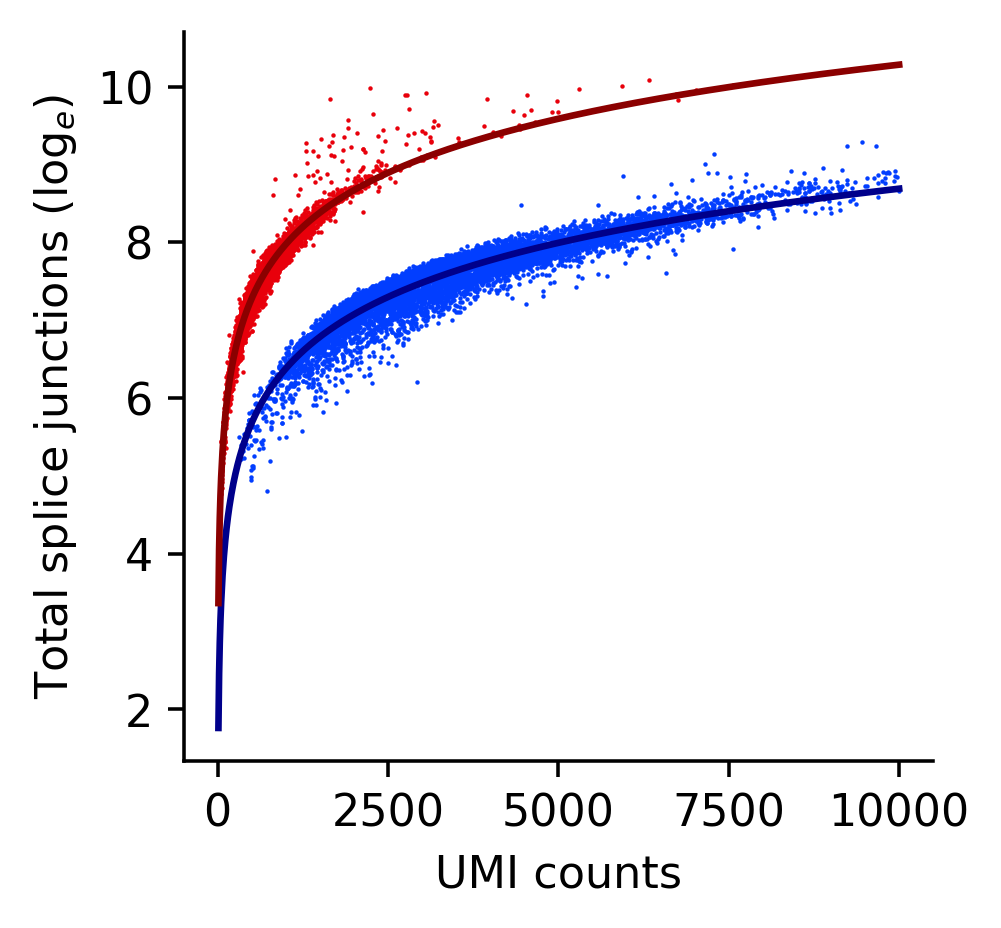

In [50]:
fig, ax = plt.subplots(figsize=(3, 3))

obs_5p = adata[(adata.obs.UMI_counts <= 10000) & (adata.obs.batch == '5prime')].obs

obs_int = adata[(adata.obs.UMI_counts <= 10000) & (adata.obs.batch == 'internal')].obs           

obs_10X = adata[(adata.obs.UMI_counts <= 10000) & (adata.obs.batch == '10X')].obs           


xfit = np.linspace(0,10000,num=1000)

x_5p = obs_5p['UMI_counts']
y_5p = obs_5p['log1p_total_counts']

sns.scatterplot(data=obs_5p,
            x=x_5p,
            y=y_5p,
           # c=kernel_5p,
           #  cmap='Blues',
             c=[c_5prime],
            s=1,
            ax=ax,
                linewidth=0
           )

sns.lineplot(x=xfit, y=logFunc(xfit, *logFit(x_5p,y_5p)), c='darkblue', ax=ax)



x_int = obs_int['UMI_counts']
y_int = obs_int['log1p_total_counts']

sns.scatterplot(
            x=x_int,
            y=y_int,
           # c=kernel_int,
           #      cmap='Reds',
             c=[c_internal],
            s=1,
            ax=ax,
    linewidth=0
           )



sns.lineplot(x=xfit, y=logFunc(xfit, *logFit(x_int,y_int)), c='darkred', ax=ax)




# x_10X = obs_10X['UMI_counts']
# y_10X = obs_10X['log1p_total_counts']

# sns.scatterplot(
#             x=x_10X,
#             y=y_10X,
#            # c=kernel_int,
#            #      cmap='Reds',
#              c=[c_10X],
#             s=1,
#             ax=ax,
#     linewidth=0
#            )



# sns.lineplot(x=xfit, y=logFunc(xfit, *logFit(x_10X,y_10X)), c='black', ax=ax)



ax.grid(False)


# ax.set_title(f"r = {round(corr,4)}",loc='left')

ax.tick_params(axis='both', which='major', labelsize=10)

ax.set_ylabel(r'Total splice junctions (log$_e$)', fontsize=10)
ax.set_xlabel('UMI counts', fontsize=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#fig.savefig('./plots/sat_curve.pdf')

In [58]:
adata.var_names

Index(['GL000008.2:12715-22765', 'GL000008.2:130584-154838',
       'GL000008.2:163999-164602', 'GL000008.2:179807-181192',
       'GL000008.2:181357-185414', 'GL000008.2:188833-199427',
       'GL000008.2:191529-191619', 'GL000008.2:191529-194451',
       'GL000008.2:191649-194451', 'GL000008.2:194534-198475',
       ...
       'chrY:9712911-9713424', 'chrY:9713566-9714069', 'chrY:9799652-9943240',
       'chrY:9837782-10132107', 'chrY:9838648-9946320', 'chrY:9897580-9943766',
       'chrY:9946205-10209203', 'chrY:9946241-9987858',
       'chrY:9968326-10220275', 'chrY:9985170-9994988'],
      dtype='object', length=998506)

In [59]:
[i for i in adata.var_names if i == 'chr1:198692374-198696711']

['chr1:198692374-198696711']

In [51]:
adata.obs['ratio_total_counts'] = adata.obs.total_counts/adata.obs.UMI_counts

In [73]:
temp = sc.get.obs_df(adata,
              keys=["batch", *['chr1:198692374-198703297']]
             )

In [74]:
temp.groupby('batch').sum()

,chr1:198692374-198703297
batch,
5prime,611.0
internal,507.0
merged,1091.0
10X,31.0


In [77]:
temp = sc.get.obs_df(adata,
              keys=["batch", *['chr1:198692374-198696711']]
             )

In [78]:
temp.groupby('batch').sum()

,chr1:198692374-198696711
batch,
5prime,699.0
internal,488.0
merged,1151.0
10X,39.0


In [ ]:
temp.groupby

ValueError: Could not interpret input 'chr1:198692374-198696711'

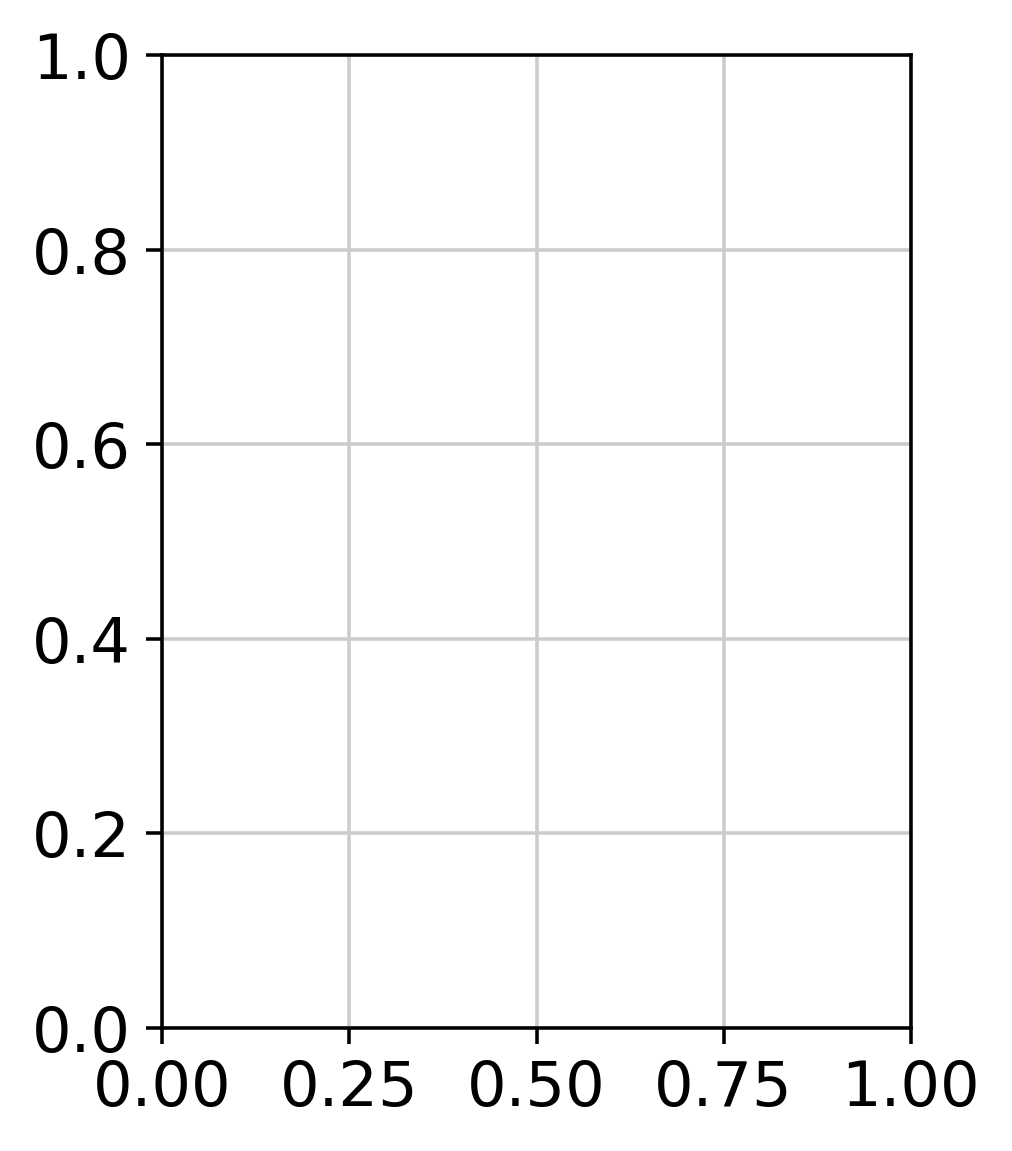

In [61]:
fig, ax = plt.subplots(1,1,
                      figsize=(3, 4))

sns.violinplot(data=adata[adata.obs.batch != 'merged'].obs, 
               x='batch',
               y='chr1:198692374-198696711', ax=ax,
               bw=.8,
               scale='area',
               cut=0,
               palette=[c_10X, c_5prime, c_internal],
               order=['10X', '5prime', 'internal']
              )

# sns.stripplot(data=adata[adata.obs.batch != 'merged'].obs,
#             x="batch", 
#             y="ratio_total_counts", 
#                    color="black", edgecolor="gray",
#               size=.5,
#               ax=ax
#          )


ax.grid(False)

ax.set_xticklabels(['10x \n5prime', 'SLR \n5prime', 'SLR \nInternal',
                   # 'Merged'
                   ],fontsize=12)
# ax.set_yticklabels(['0','1','2','3','4','5','6','7','8'],
#                    fontsize=6)


ax.set(ylim=(-0.5, 8.5))

ax.set_ylabel("splice junctions \n per UMI ", fontsize=12)
ax.set_xlabel('Library type', fontsize=12)



# fig.savefig(output_dir + 'comparison_SJ_per_UMI_ratio_violins.pdf')

In [53]:
adata.obs.groupby('batch')['ratio_total_counts'].mean()

batch
5prime      0.599760
internal    2.926651
merged      1.117890
10X         0.498336
Name: ratio_total_counts, dtype: float64

In [54]:
2.926651/0.599760

4.879703548085901

In [55]:
adata.obs['log_UMI_couts'] = np.log10(adata.obs.UMI_counts)

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

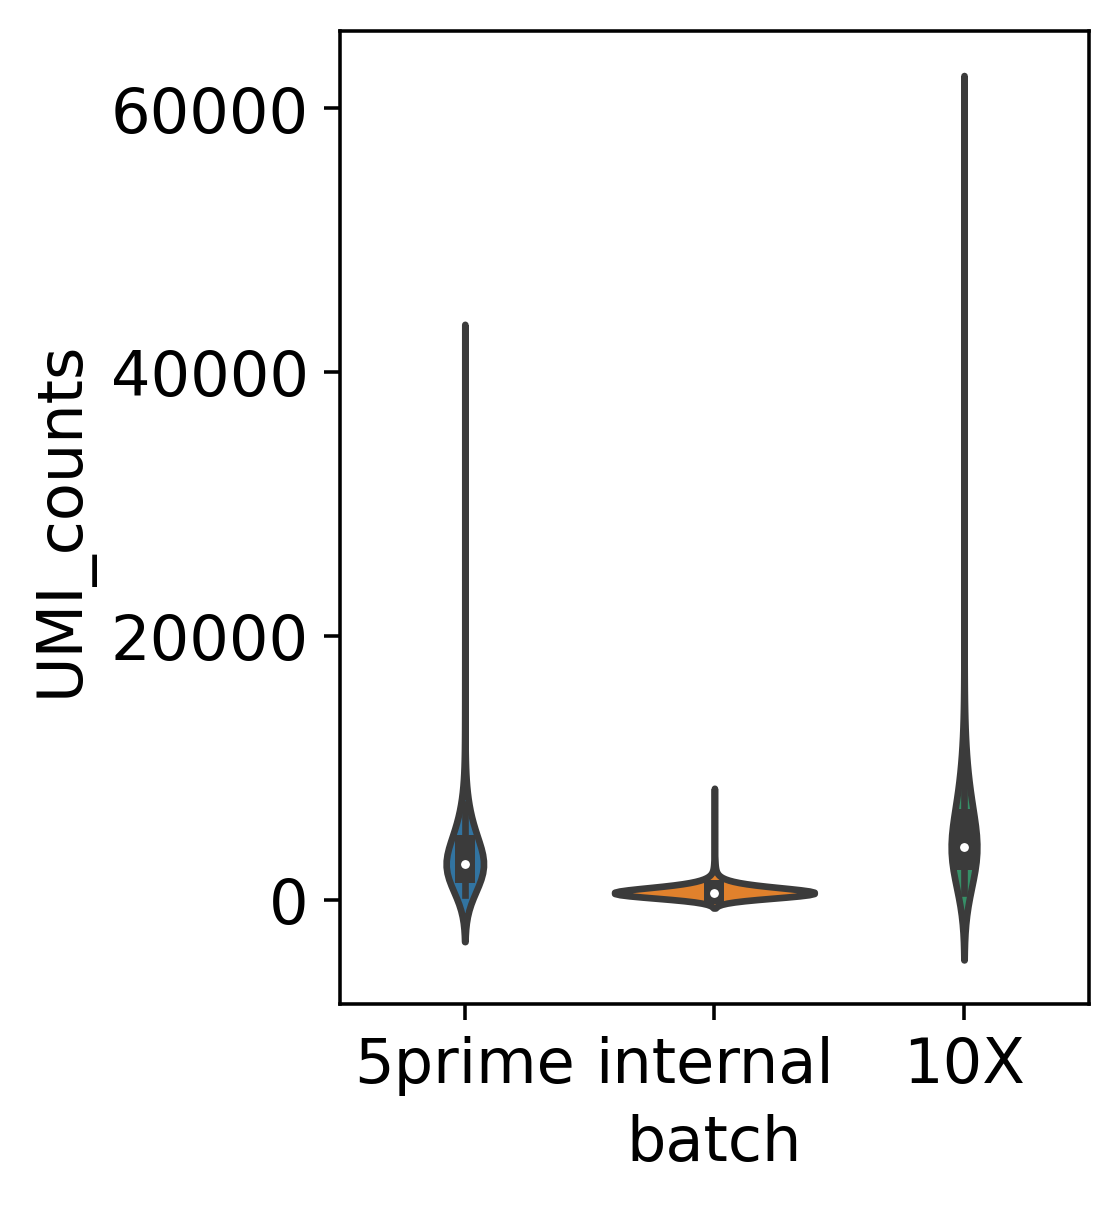

In [56]:
fig, ax = plt.subplots(1,1,
                      figsize=(3, 4))

sns.violinplot(data=adata[adata.obs.batch != 'merged'].obs, 
               x='batch',
               y='UMI_counts', ax=ax,
               bw=.8,
               scale='area'
              )

# sns.stripplot(data=adata[adata.obs.batch != 'merged'].obs,
#             x="batch", 
#             y="ratio_total_counts", 
#                    color="black", edgecolor="gray",
#               size=.7,
#               ax=ax
#          )


ax.grid(False)

ax.set_xticklabels(['5prime', 'Internal',
                   # 'Merged'
                   ],fontsize=12)
#ax.set_yticklabels(fontsize=12)

ax.set(ylim=(-4500, 24500))


ax.set_ylabel(" ", fontsize=12)
ax.set_xlabel('Library type', fontsize=12)

#fig.savefig(output_dir + 'comparison_SJ_ratio_violins.pdf')

In [ ]:
!conda list